### 2° peak search algorithm --- [source](https://williamsantos.me/posts/2023/spectrogram-peak-detection-with-scipy/#fn.3) ---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from librosa import load as load_audio, stft, amplitude_to_db
from librosa.display import specshow
from statistics import NormalDist
from scipy.ndimage import label as label_features
from scipy.ndimage import maximum_position as extract_region_maximums

In [3]:
def peak_detection(file_path, threshold):
    y, _ = load_audio(path=file_path, sr=None)

    #do transformations
    x = stft(y)
    x = amplitude_to_db(abs(x))
    
    #remove zero values
    flattened = np.matrix.flatten(x)
    filtered = flattened[flattened > np.min(flattened)]

    #create a normal distribution from frequency intensities
    #then map a zscore onto each intensity value
    ndist = NormalDist(np.mean(filtered), np.std(filtered))
    zscore = np.vectorize(lambda x: ndist.zscore(x))
    zscore_matrix = zscore(x)

    #create label matrix from frequency intensities that are
    #above threshold
    print(zscore_matrix)
    mask_matrix = zscore_matrix > threshold
    labelled_matrix, num_regions = label_features(mask_matrix)
    label_indices = np.arange(num_regions) + 1

    #for each isolated region in the mask, identify the maximum
    #value, then extract it position
    peak_positions = extract_region_maximums(zscore_matrix, labelled_matrix, label_indices)

    #finally, create list of peaks (time, frequency, intensity)
    peaks = [[x, y] for y, x in peak_positions]

    _, ax = plt.subplots(figsize=(16, 8))

    ax.scatter(
        x=[p[0] for p in peaks],
        y=[p[1] for p in peaks],
        s=2,
        color="red"
    )
    ax.matshow(x)
    return peaks

[[-1.58222814 -1.21314888  1.53805643 ... -1.58222814 -1.58222814
  -1.58222814]
 [-1.58222814  0.63091865  1.67855069 ... -1.58222814 -1.58222814
  -1.58222814]
 [-1.58222814  0.98692698  1.93517359 ... -1.58222814 -1.58222814
  -1.58222814]
 ...
 [-1.58222814 -1.58222814 -1.58222814 ... -1.58222814 -1.58222814
  -1.58222814]
 [-1.58222814 -1.58222814 -1.58222814 ... -1.58222814 -1.58222814
  -1.58222814]
 [-1.58222814 -1.58222814 -1.58222814 ... -1.58222814 -1.58222814
  -1.58222814]]
164
[[-1.57598277 -0.44119765  0.7101971  ... -1.04293535 -1.26410441
  -1.79475451]
 [-1.72860937  0.06121847  0.55864085 ... -1.10660371 -1.7132568
  -1.95558429]
 [-2.15007737  0.41596976  1.31368614 ... -1.41548754 -1.62819976
  -2.05589103]
 ...
 [-2.22221834 -2.22221834 -2.22221834 ... -2.22221834 -2.22221834
  -2.22221834]
 [-2.22221834 -2.22221834 -2.22221834 ... -2.22221834 -2.22221834
  -2.22221834]
 [-2.22221834 -2.22221834 -2.22221834 ... -2.22221834 -2.22221834
  -2.22221834]]
498


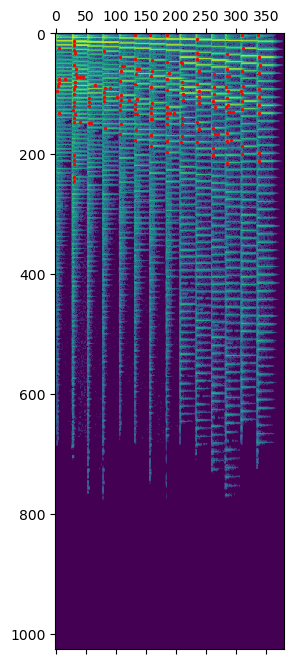

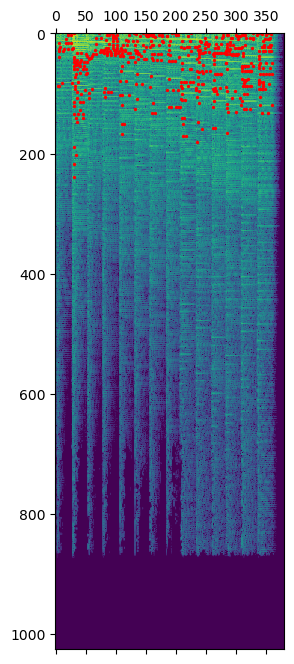

In [6]:
audio_file_path = "../audios/scala.mp3"
print(len(peak_detection(audio_file_path, 2)))
audio_file_path = "../audios/scala_Chorus_high.mp3"
print(len(peak_detection(audio_file_path, 2)))

Base testing

In [ ]:
audio_file_path = "test_audios/G4_guitar.mp3"

#load samples into ndarray
y, sr = load_audio(path=audio_file_path, sr=None)

#do transformations
#fourier transform -> spectrogram
x = y
x = stft(x)
x = amplitude_to_db(abs(x))

#plots
plt.figure(figsize=(14, 5))
specshow(x, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

fig, ax = plt.subplots(figsize=(16, 8))
ax.matshow(x) #upside down flipped version

spectrogram = x

# number of standard deviations away from the mean
threshold = 3.5

# remove zero values
flattened = np.matrix.flatten(spectrogram)
filtered = flattened[flattened > np.min(flattened)]

# create a normal distribution from frequency intensities
# then map a zscore onto each intensity value
ndist = NormalDist(np.mean(filtered), np.std(filtered))
zscore = np.vectorize(lambda x: ndist.zscore(x))
zscore_matrix = zscore(spectrogram)

# create label matrix from frequency intensities that are
# above threshold
mask_matrix = zscore_matrix > threshold
labelled_matrix, num_regions = label_features(mask_matrix)
label_indices = np.arange(num_regions) + 1

# for each isolated region in the mask, identify the maximum
# value, then extract it position
peak_positions = extract_region_maximums(
    zscore_matrix, labelled_matrix, label_indices)

# finally, create list of peaks (time, frequency, intensity)
peaks = [(x, y, spectrogram[y, x]) for y, x in peak_positions]
print(len(peaks))

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=[p[0] for p in peaks],
    y=[p[1] for p in peaks],
    s=2,
    color="red"
)

#zoom
ax.matshow(x[:500, :600]) 